### 2.1 Zielvariable

Für meine Analyse wähle ich die Zielvariable **durchschnittliche Spielzeit** (Average playtime forever).  
Das bedeutet, ich möchte vorhersagen, wie lange ein Spiel basierend auf seinem **Preis** im Durchschnitt gespielt wird. 

Der **Preis** eines Spiels könnte dabei als **Einflussfaktor** dienen, da häufig angenommen wird, dass teurere Spiele auch mehr oder länger gespielt werden.  
Ich möchte also untersuchen, ob es eine **positive Korrelation** zwischen dem Preis eines Spiels und der **durchschnittlichen Spielzeit** gibt.



In [6]:
import pandas as pd
import os

games = pd.read_csv(os.path.join(r"C:\Users\david\OneDrive\Desktop\Python lb\games (1).csv"), delimiter=';', encoding='ISO-8859-1')

games.head(30)


,AppID,Name,Release date,Estimated owners,Required age,Price,DLC count,Supported languages,Website,Windows,Mac,Linux,Positive,Negative,Achievements,Average playtime forever,Median playtime forever,Developers,Publishers,Categories
0,20200,Galactic Bowling,21.10.2008,0 - 20000,0,19.99,0,['English'],http://www.galacticbowling.net,WAHR,FALSCH,FALSCH,6,11,30,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,..."
1,655370,Train Bandit,12.10.2017,0 - 20000,0,0.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",http://trainbandit.com,WAHR,WAHR,FALSCH,53,5,12,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll..."
2,1732930,Jolt Project,17.11.2021,0 - 20000,0,4.99,0,"['English', 'Portuguese - Brazil']",NaN,WAHR,FALSCH,FALSCH,0,0,0,0,0,Campião Games,Campião Games,Single-player
3,1355720,Henosis,23.07.2020,0 - 20000,0,5.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",https://henosisgame.com/,WAHR,WAHR,WAHR,3,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support"
4,1139950,Two Weeks in Painland,03.02.2020,0 - 20000,0,0.00,0,"['English', 'Spanish - Spain']",https://www.unusual-games.com/home/,WAHR,WAHR,FALSCH,50,8,17,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements"
5,1469160,Wartune Reborn,26.02.2021,50000 - 100000,0,0.00,0,['English'],NaN,WAHR,FALSCH,FALSCH,87,49,0,0,0,7Road,7Road,"Single-player,Multi-player,MMO,PvP,Online PvP,..."
6,1659180,TD Worlds,09.01.2022,0 - 20000,0,10.99,1,"['English', 'Russian', 'Danish']",NaN,WAHR,FALSCH,FALSCH,21,7,62,0,0,MAKSIM VOLKAU,MAKSIM VOLKAU,"Single-player,Steam Achievements,Steam Cloud"
7,1968760,Legend of Rome - The Wrath of Mars,05.05.2022,0 - 20000,0,9.99,0,"['English', 'German']",http://magnussoft.biz/,WAHR,FALSCH,FALSCH,0,0,0,0,0,magnussoft,magnussoft,"Single-player,Steam Cloud"
8,1178150,MazM: Jekyll and Hyde,02.04.2020,0 - 20000,0,14.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",http://www.cfk.kr/,WAHR,FALSCH,FALSCH,76,6,25,0,0,Growing Seeds,"CFK Co., Ltd.","Single-player,Steam Achievements,Full controll..."
9,320150,Deadlings: Rotten Edition,11.11.2014,50000 - 100000,0,3.99,0,"['English', 'Polish', 'French', 'Italian', 'Ge...",http://www.omlgames.com,WAHR,WAHR,WAHR,225,45,32,703,782,ONE MORE LEVEL,ONE MORE LEVEL,"Single-player,Steam Achievements,Steam Trading..."



### 2.4 Skalierung

In diesem Schritt habe ich den **Preis** sowie die **durchschnittliche Spielzeit** der Spiele mit dem **MinMaxScaler** normalisiert. Ziel der Skalierung ist es, die Werte der beiden Variablen in den gleichen Wertebereich von 0 bis 1 zu bringen. Dies ist besonders wichtig, um Verzerrungen bei der Analyse oder möglichen Vorhersagemodellen (wie einer Regression) zu vermeiden, da der Preis in Euro und die Spielzeit in Minuten ursprünglich unterschiedliche Grössenordnungen haben.

Durch die Skalierung wird ausserdem die Vergleichbarkeit der beiden Variablen erhöht.



In [81]:
# Filter: Keine 0-Spielzeit
filtered_games = games[games['Average playtime forever'] > 0].copy()

### 1️⃣ Preis normalisieren
min_price = filtered_games['Price'].min()
max_price = filtered_games['Price'].max()

filtered_games['Price_normalised'] = (
    (filtered_games['Price'] - min_price) /
    (max_price - min_price)
)

### 2️⃣ Durchschnittliche Spielzeit normalisieren
min_playtime = filtered_games['Average playtime forever'].min()
max_playtime = filtered_games['Average playtime forever'].max()

filtered_games['Average playtime forever_normalised'] = (
    (filtered_games['Average playtime forever'] - min_playtime) /
    (max_playtime - min_playtime)
)

### 3️⃣ Statistik für normalisierten Preis
print(f"🟢 Statistik für den normalisierten Preis:")
print(f"Anzahl der Spiele:      {filtered_games['Price_normalised'].count():,.0f}")
print(f"Mittelwert:             {filtered_games['Price_normalised'].mean():.6f}")
print(f"Standardabweichung:     {filtered_games['Price_normalised'].std():.6f}")
print(f"Minimum:                {filtered_games['Price_normalised'].min():.6f}")
print(f"25% Quartil:            {filtered_games['Price_normalised'].quantile(0.25):.6f}")
print(f"Median (50% Quartil):   {filtered_games['Price_normalised'].median():.6f}")
print(f"75% Quartil:            {filtered_games['Price_normalised'].quantile(0.75):.6f}")
print(f"Maximum:                {filtered_games['Price_normalised'].max():.6f}")
print()

### 4️⃣ Statistik für normalisierte Spielzeit
print(f"🟢 Statistik für die normalisierte durchschnittliche Spielzeit:")
print(f"Anzahl der Spiele:      {filtered_games['Average playtime forever_normalised'].count():,.0f}")
print(f"Mittelwert:             {filtered_games['Average playtime forever_normalised'].mean():.6f}")
print(f"Standardabweichung:     {filtered_games['Average playtime forever_normalised'].std():.6f}")
print(f"Minimum:                {filtered_games['Average playtime forever_normalised'].min():.6f}")
print(f"25% Quartil:            {filtered_games['Average playtime forever_normalised'].quantile(0.25):.6f}")
print(f"Median (50% Quartil):   {filtered_games['Average playtime forever_normalised'].median():.6f}")
print(f"75% Quartil:            {filtered_games['Average playtime forever_normalised'].quantile(0.75):.6f}")
print(f"Maximum:                {filtered_games['Average playtime forever_normalised'].max():.6f}")



🟢 Statistik für den normalisierten Preis:
Anzahl der Spiele:      14,911
Mittelwert:             0.036118
Standardabweichung:     0.039497
Minimum:                0.000000
25% Quartil:            0.006636
Median (50% Quartil):   0.026642
75% Quartil:            0.049983
Maximum:                1.000000

🟢 Statistik für die normalisierte durchschnittliche Spielzeit:
Anzahl der Spiele:      14,911
Mittelwert:             0.004095
Standardabweichung:     0.018355
Minimum:                0.000000
25% Quartil:            0.000494
Median (50% Quartil):   0.001441
75% Quartil:            0.002745
Maximum:                1.000000


## 2.2 Statistische Informationen

Ich habe bei den Feldern wo Median 0 ist, denn Median entfernt.
Bei der Skalierung habe ich auch ein paar weitere Informationen.



In [71]:
# Price
print("🟢 Preis:")
print("Mittelwert:", games['Price'].mean())
print("Median:", games['Price'].median())
print("Standardabweichung:", games['Price'].std())
print()

# Required age
print("🟢 Required age:")

print("Mittelwert:", games['Required age'].mean())

print("Standardabweichung:", games['Required age'].std())
print()

# DLC count
print("🟢 DLC count:")
print("Mittelwert:", games['DLC count'].mean())

print("Standardabweichung:", games['DLC count'].std())
print()

# Positive Bewertungen
print("🟢 Positive Bewertungen:")
print("Mittelwert:", games['Positive'].mean())
print("Median:", games['Positive'].median())
print("Standardabweichung:", games['Positive'].std())
print()

# Negative Bewertungen
print("🟢 Negative Bewertungen:")
print("Mittelwert:", games['Negative'].mean())
print("Median:", games['Negative'].median())
print("Standardabweichung:", games['Negative'].std())
print()

# Average playtime forever
print("🟢 Durchschnittliche Spielzeit (forever):")
print("Mittelwert:", games['Average playtime forever'].mean())

print("Standardabweichung:", games['Average playtime forever'].std())
print()




🟢 Preis:
Mittelwert: 7.1937026896819125
Median: 4.49
Standardabweichung: 12.362477772662649

🟢 Required age:
Mittelwert: 0.31277393276382737
Standardabweichung: 2.2547206411292096

🟢 DLC count:
Mittelwert: 0.5434121006310001
Standardabweichung: 13.721222559680365

🟢 Positive Bewertungen:
Mittelwert: 958.5608850451805
Median: 7.0
Standardabweichung: 24359.199082938117

🟢 Negative Bewertungen:
Mittelwert: 159.77256970964595
Median: 2.0
Standardabweichung: 4574.583902540061

🟢 Durchschnittliche Spielzeit (forever):
Mittelwert: 104.72968050480007
Standardabweichung: 1142.4475166157213




### 2.3 Grafik: Preis vs Durchschnittliche Spielzeit

Ich habe den Zusammenhang zwischen dem **Preis** eines Spiels und der **durchschnittlichen Spielzeit** untersucht. Hierzu habe ich eine lineare Regression durchgeführt. Es zeigt sich eine leichte positive Tendenz: Höhere Preise (eher mittlerer Bereich) gehen tendenziell mit längeren Spielzeiten einher, jedoch ist der Zusammenhang insgesamt schwach.

Zusätzlich habe ich die Daten auch skaliert (Preis und Spielzeit auf einen Bereich von 0 bis 1 normiert), um die Werte vergleichbar zu machen. Für die Interpretation und Darstellung der Ergebnisse erwies sich jedoch die unskalierte Variante als besser geeignet, da die Einheiten (Euro, Minuten) erhalten bleiben und direkt verständlich sind.


C:\Users\david\AppData\Local\Temp\ipykernel_32464\716855772.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_playtime_per_price = filtered_games.groupby('Price Range')['Average playtime forever'].mean()


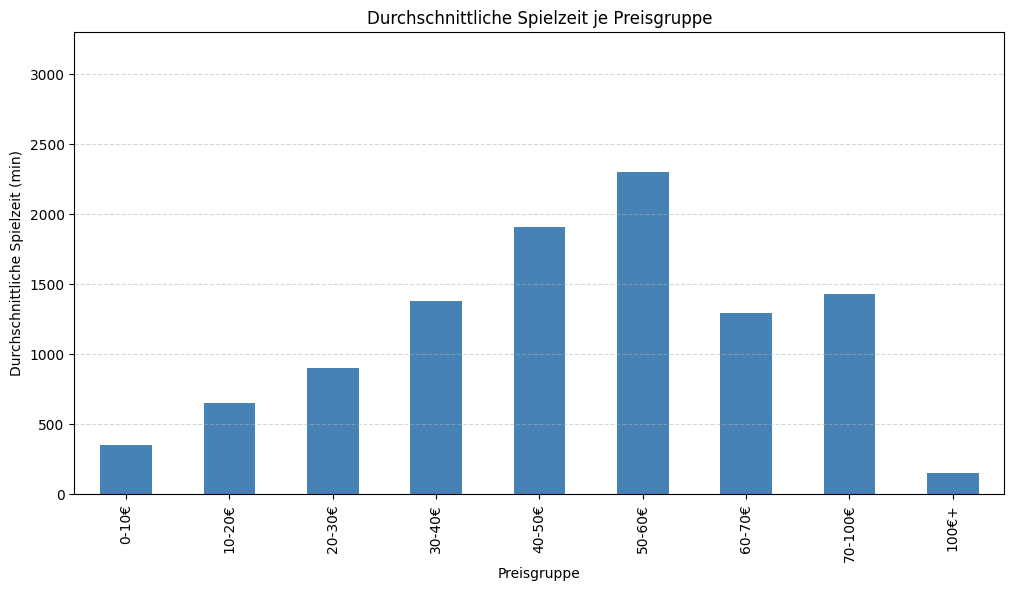

In [82]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter: Keine 0-Spielzeit
filtered_games = games[games['Average playtime forever'] > 0].copy()  # WICHTIG: .copy() → Warnung weg!

# Preis-Kategorien inkl. 100€+
bins = [0, 10, 20, 30, 40, 50, 60, 70, 100, filtered_games['Price'].max()]
labels = ['0-10€', '10-20€', '20-30€', '30-40€', '40-50€', '50-60€', '60-70€', '70-100€', '100€+']

# Neue Spalte: Preisgruppen
filtered_games['Price Range'] = pd.cut(filtered_games['Price'], bins=bins, labels=labels)

# Gruppieren & Durchschnitt berechnen
avg_playtime_per_price = filtered_games.groupby('Price Range')['Average playtime forever'].mean()

# Plot
plt.figure(figsize=(12,6))
avg_playtime_per_price.plot(kind='bar', color='steelblue')

plt.title('Durchschnittliche Spielzeit je Preisgruppe')
plt.xlabel('Preisgruppe')
plt.ylabel('Durchschnittliche Spielzeit (min)')

plt.ylim(0, avg_playtime_per_price.max() + 1000)  # Y-Achse grösser machen!

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


